In [1]:
import numpy as np
import seaborn as sns
import glob
import cv2
import joblib
import time
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss
from skimage.feature import hog
from skimage.color import rgb2gray

from joblib import dump, load

In [2]:
def filter_small_images(image_paths, min_width=32, min_height=32):
    """Filter out images smaller than the specified min_width and min_height."""
    filtered_paths = []
    for path in image_paths:
        with Image.open(path) as img:
            width, height = img.size
            if width >= min_width and height >= min_height:
                filtered_paths.append(path)
    return filtered_paths

def get_images_from_directory(directory, extensions):
    """Retrieve images with specified extensions from a directory."""
    images = []
    for ext in extensions:
        images.extend(glob.glob(f'{directory}/*.{ext}'))
    return images

# Specify common image extensions
extensions = ['png', 'jpg']

# Retrieve and filter images for all categories
ambulance = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\ambulance', extensions))
print(f'Images with ambulance: {len(ambulance)}')

bus = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\bus', extensions))
print(f'Images with bus: {len(bus)}')

car = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\car', extensions))
print(f'Images with car: {len(car)}')

crosswalk = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\crosswalk', extensions))
print(f'Images with crosswalk: {len(crosswalk)}')

cyclist = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\cyclist', extensions))
print(f'Images with cyclist: {len(cyclist)}')

dont_care = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\dont-care', extensions))
print(f'Images with objects we dont care about: {len(dont_care)}')

fire_hydrant = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\fire-hydrant', extensions))
print(f'Images with fire hydrant: {len(fire_hydrant)}')

green_forward_traffic_light = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\green-forward-traffic-light', extensions))
print(f'Images with green forward traffic light: {len(green_forward_traffic_light)}')

green_advance_left_traffic_light = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\green-advance-left-traffic-light', extensions))
print(f'Images with green advance left traffic light: {len(green_advance_left_traffic_light)}')

green_traffic_light = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\green-traffic-light', extensions))
print(f'Images with green traffic light: {len(green_traffic_light)}')

misc = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\misc', extensions))
print(f'Images with miscellaneous objects: {len(misc)}')

motorcycle = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\motorcycle', extensions))
print(f'Images with motorcycle: {len(motorcycle)}')

no_object = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\no-object', extensions))
print(f'Images with no objects: {len(no_object)}')

pedestrian = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\pedestrian', extensions))
print(f'Images with pedestrian: {len(pedestrian)}')

person = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\person', extensions))
print(f'Images with person sitting: {len(person)}')

red_advance_left_traffic_light = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\red-advance-left-traffic-light', extensions))
print(f'Images with red advance left traffic light: {len(red_advance_left_traffic_light)}')

red_traffic_light = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\red-traffic-light', extensions))
print(f'Images with red traffic light: {len(red_traffic_light)}')

scooter = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\scooter', extensions))
print(f'Images with scooter: {len(scooter)}')

stop_sign = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\stop-sign', extensions))
print(f'Images with stop sign: {len(stop_sign)}')

traffic_cone = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\traffic-cone', extensions))
print(f'Images with traffic cone: {len(traffic_cone)}')

tram = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\tram', extensions))
print(f'Images with trams/trains: {len(tram)}')

truck = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\truck', extensions))
print(f'Images with truck: {len(truck)}')

van = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\van', extensions))
print(f'Images with van: {len(van)}')

yellow_traffic_light = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\yellow-traffic-light', extensions))
print(f'Images with yellow traffic light: {len(yellow_traffic_light)}')

yellow_advance_left_traffic_light = filter_small_images(get_images_from_directory('..\\datasets\\classification-full\\cropped-images\\yellow-advance-left-traffic-light', extensions))
print(f'Images with yellow advance left traffic light: {len(yellow_advance_left_traffic_light)}')


Images with ambulance: 248
Images with bus: 359


KeyboardInterrupt: 

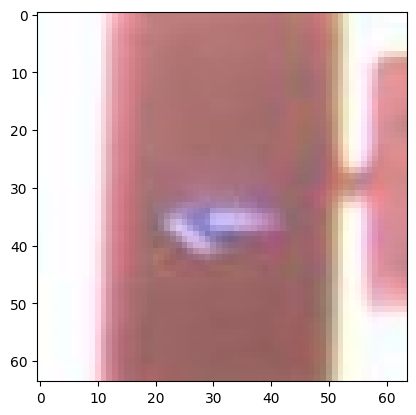

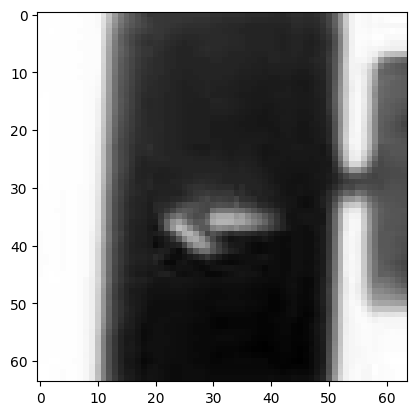

In [3]:
image_colour = cv2.imread(yellow_advance_left_traffic_light[22])
image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
plt.figure()
plt.imshow(image_colour)

image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(image_grey, cmap='gray')

(396,)
(64, 64)


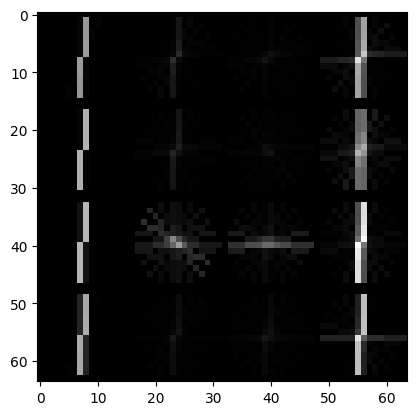

In [4]:
features, hog_image = hog(image_grey, 
                          orientations=11,
                          pixels_per_cell=(16, 16), 
                          cells_per_block=(2, 2),  
                          transform_sqrt=False,
                          visualize=True, 
                          feature_vector=True) #,block_norm='L2-Hys')

print(features.shape)
print(hog_image.shape)

plt.imshow(hog_image, cmap='gray')

In [25]:
ambulance_hog_accum = []

for i in ambulance:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    ambulance_hog_feature, ambulance_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True)
    ambulance_hog_accum.append(ambulance_hog_feature)

X_ambulance = np.vstack(ambulance_hog_accum).astype(np.float64)
y_ambulance = np.zeros(len(X_ambulance))

print(X_ambulance.shape)
print(y_ambulance.shape)
print(y_ambulance)

(248, 396)
(248,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [26]:
bus_hog_accum = []

for i in bus:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    bus_hog_feature, bus_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True)
    bus_hog_accum.append(bus_hog_feature)

X_bus = np.vstack(bus_hog_accum).astype(np.float64)
y_bus = np.ones(len(X_bus))

print(X_bus.shape)
print(y_bus.shape)
print(y_bus)

(359, 396)
(359,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [27]:
car_hog_accum = []

for i in car:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    car_hog_feature, car_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True) #True
    
    car_hog_accum.append(car_hog_feature)

X_car = np.vstack(car_hog_accum).astype(np.float64)
y_car = np.full(len(X_car), 2)

print(X_car.shape)
print(y_car.shape)
print(y_car)

(29236, 396)
(29236,)
[2 2 2 ... 2 2 2]


In [28]:
crosswalk_hog_accum = []

for i in crosswalk:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    crosswalk_hog_feature, crosswalk_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True)
    crosswalk_hog_accum.append(crosswalk_hog_feature)

X_crosswalk = np.vstack(crosswalk_hog_accum).astype(np.float64)
y_crosswalk = np.full(len(X_crosswalk), 3)

print(X_crosswalk.shape)
print(y_crosswalk.shape)
print(y_crosswalk)


(131, 396)
(131,)
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [29]:
cyclist_hog_accum = []

for i in cyclist:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    
    cyclist_hog_feature, cyclist_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True) #True
    
    cyclist_hog_accum.append(cyclist_hog_feature)

X_cyclist = np.vstack(cyclist_hog_accum).astype(np.float64)
y_cyclist = np.full(len(X_cyclist), 4)

print(X_cyclist.shape)
print(y_cyclist.shape)
print(y_cyclist)

(1671, 396)
(1671,)
[4 4 4 ... 4 4 4]


In [30]:
dont_care_hog_accum = []

for i in dont_care:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    dont_care_hog_feature, dont_care_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True)
    dont_care_hog_accum.append(dont_care_hog_feature)
    
X_dont_care = np.vstack(dont_care_hog_accum).astype(np.float64)
y_dont_care = np.full(len(X_dont_care), 5)

print(X_dont_care.shape)
print(y_dont_care.shape)
print(y_dont_care)

(7079, 396)
(7079,)
[5 5 5 ... 5 5 5]


In [31]:
fire_hydrant_hog_accum = []

for i in fire_hydrant:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    fire_hydrant_hog_feature, fire_hydrant_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True)
    fire_hydrant_hog_accum.append(fire_hydrant_hog_feature)

X_fire_hydrant = np.vstack(fire_hydrant_hog_accum).astype(np.float64)
y_fire_hydrant = np.full(len(X_fire_hydrant), 6)

print(X_fire_hydrant.shape)
print(y_fire_hydrant.shape)
print(y_fire_hydrant)

(103, 396)
(103,)
[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]


In [32]:
green_advance_left_traffic_light_hog_accum = []

for i in green_advance_left_traffic_light:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    green_advance_left_traffic_light_hog_feature, green_advance_left_traffic_light_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True)
    green_advance_left_traffic_light_hog_accum.append(green_advance_left_traffic_light_hog_feature)

X_green_advance_left_traffic_light = np.vstack(green_advance_left_traffic_light_hog_accum).astype(np.float64)
y_green_advance_left_traffic_light = np.full(len(X_green_advance_left_traffic_light), 7)

print(X_green_advance_left_traffic_light.shape)
print(y_green_advance_left_traffic_light.shape)
print(y_green_advance_left_traffic_light)

(249, 396)
(249,)
[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


In [33]:
green_forward_traffic_light_hog_accum = []

for i in green_forward_traffic_light:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    green_forward_traffic_light_hog_feature, green_forward_traffic_light_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True)
    green_forward_traffic_light_hog_accum.append(green_forward_traffic_light_hog_feature)

X_green_forward_traffic_light = np.vstack(green_forward_traffic_light_hog_accum).astype(np.float64)
y_green_forward_traffic_light = np.full(len(X_green_forward_traffic_light), 8)

print(X_green_forward_traffic_light.shape)
print(y_green_forward_traffic_light.shape)
print(y_green_forward_traffic_light)

(78, 396)
(78,)
[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8]


In [34]:
green_traffic_light_hog_accum = []

for i in green_traffic_light:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    green_traffic_light_hog_feature, green_traffic_light_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True)
    green_traffic_light_hog_accum.append(green_traffic_light_hog_feature)

X_green_traffic_light = np.vstack(green_traffic_light_hog_accum).astype(np.float64)
y_green_traffic_light = np.full(len(X_green_traffic_light), 9)

print(X_green_traffic_light.shape)
print(y_green_traffic_light.shape)
print(y_green_traffic_light)


(2674, 396)
(2674,)
[9 9 9 ... 9 9 9]


In [35]:
misc_hog_accum = []

for i in misc:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    misc_hog_feature, misc_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True)
    misc_hog_accum.append(misc_hog_feature)

X_misc = np.vstack(misc_hog_accum).astype(np.float64)
y_misc = np.full(len(X_misc), 10)

print(X_misc.shape)
print(y_misc.shape)
print(y_misc)

(639, 396)
(639,)
[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10

In [36]:
motorcycle_hog_accum = []

for i in motorcycle:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    motorcycle_hog_feature, motorcycle_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True)
    motorcycle_hog_accum.append(motorcycle_hog_feature)

X_motorcycle = np.vstack(motorcycle_hog_accum).astype(np.float64)
y_motorcycle = np.full(len(X_motorcycle), 11)

print(X_motorcycle.shape)
print(y_motorcycle.shape)
print(y_motorcycle)

(273, 396)
(273,)
[11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11]


In [37]:
no_object_hog_accum = []

for i in no_object:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    no_object_hog_feature, no_object_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True) #True
    
    no_object_hog_accum.append(no_object_hog_feature)

X_no_object = np.vstack(no_object_hog_accum).astype(np.float64)
y_no_object = np.full(len(X_no_object), 12)

print(X_no_object.shape)
print(y_no_object.shape)
print(y_no_object)

(17961, 396)
(17961,)
[12 12 12 ... 12 12 12]


In [38]:
pedestrian_hog_accum = []

for i in pedestrian:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    pedestrian_hog_feature, pedestrian_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True) #True
    
    pedestrian_hog_accum.append(pedestrian_hog_feature)

X_pedestrian = np.vstack(pedestrian_hog_accum).astype(np.float64)
y_pedestrian = np.full(len(X_pedestrian), 13)

print(X_pedestrian.shape)
print(y_pedestrian.shape)
print(y_pedestrian)

(7311, 396)
(7311,)
[13 13 13 ... 13 13 13]


In [39]:
person_hog_accum = []

for i in person:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    person_hog_feature, person_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True)
    person_hog_accum.append(person_hog_feature)

X_person = np.vstack(person_hog_accum).astype(np.float64)
y_person = np.full(len(X_person), 14)

print(X_person.shape)
print(y_person.shape)
print(y_person)

(666, 396)
(666,)
[14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14

In [40]:
red_advance_left_traffic_light_hog_accum = []

for i in red_advance_left_traffic_light:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    red_advance_left_traffic_light_hog_feature, red_advance_left_traffic_light_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True)
    red_advance_left_traffic_light_hog_accum.append(red_advance_left_traffic_light_hog_feature)

X_red_advance_left_traffic_light = np.vstack(red_advance_left_traffic_light_hog_accum).astype(np.float64)
y_red_advance_left_traffic_light = np.full(len(X_red_advance_left_traffic_light), 15)

print(X_red_advance_left_traffic_light.shape)
print(y_red_advance_left_traffic_light.shape)
print(y_red_advance_left_traffic_light)

(110, 396)
(110,)
[15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15]


In [41]:
red_traffic_light_hog_accum = []

for i in red_traffic_light:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    red_traffic_light_hog_feature, red_traffic_light_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True)
    red_traffic_light_hog_accum.append(red_traffic_light_hog_feature)

X_red_traffic_light = np.vstack(red_traffic_light_hog_accum).astype(np.float64)
y_red_traffic_light = np.full(len(X_red_traffic_light), 16)

print(X_red_traffic_light.shape)
print(y_red_traffic_light.shape)
print(y_red_traffic_light)

(2729, 396)
(2729,)
[16 16 16 ... 16 16 16]


In [42]:
scooter_hog_accum = []

for i in scooter:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    scooter_hog_feature, scooter_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True)
    scooter_hog_accum.append(scooter_hog_feature)

X_scooter = np.vstack(scooter_hog_accum).astype(np.float64)
y_scooter = np.full(len(X_scooter), 17)

print(X_scooter.shape)
print(y_scooter.shape)
print(y_scooter)

(90, 396)
(90,)
[17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17]


In [43]:
stop_sign_hog_accum = []

for i in stop_sign:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    stop_sign_hog_feature, stop_sign_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True)
    stop_sign_hog_accum.append(stop_sign_hog_feature)

X_stop_sign = np.vstack(stop_sign_hog_accum).astype(np.float64)
y_stop_sign = np.full(len(X_stop_sign), 18)

print(X_stop_sign.shape)
print(y_stop_sign.shape)
print(y_stop_sign)

(54, 396)
(54,)
[18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18]


In [44]:
traffic_cone_hog_accum = []

for i in traffic_cone:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    traffic_cone_hog_feature, traffic_cone_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True)
    traffic_cone_hog_accum.append(traffic_cone_hog_feature)

X_traffic_cone = np.vstack(traffic_cone_hog_accum).astype(np.float64)
y_traffic_cone = np.full(len(X_traffic_cone), 19)

print(X_traffic_cone.shape)
print(y_traffic_cone.shape)
print(y_traffic_cone)

(87, 396)
(87,)
[19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19]


In [45]:
tram_hog_accum = []

for i in tram:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    tram_hog_feature, tram_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True) #True
    
    tram_hog_accum.append(tram_hog_feature)

X_tram = np.vstack(tram_hog_accum).astype(np.float64)
y_tram = np.full(len(X_tram), 20)

print(X_tram.shape)
print(y_tram.shape)
print(y_tram)

(117, 396)
(117,)
[20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]


In [46]:
truck_hog_accum = []

for i in truck:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    truck_hog_feature, truck_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True) #True
    
    truck_hog_accum.append(truck_hog_feature)

X_truck = np.vstack(truck_hog_accum).astype(np.float64)
y_truck = np.full(len(X_truck), 21)

print(X_truck.shape)
print(y_truck.shape)
print(y_truck)

(1396, 396)
(1396,)
[21 21 21 ... 21 21 21]


In [47]:
van_hog_accum = []

for i in van:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    van_hog_feature, van_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True) #True
    
    van_hog_accum.append(van_hog_feature)

X_van = np.vstack(van_hog_accum).astype(np.float64)
y_van = np.full(len(X_van), 22)

print(X_van.shape)
print(y_van.shape)
print(y_van)

(2560, 396)
(2560,)
[22 22 22 ... 22 22 22]


In [50]:
yellow_advance_left_traffic_light_hog_accum = []

for i in yellow_advance_left_traffic_light:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    yellow_advance_left_traffic_light_hog_feature, yellow_advance_left_traffic_light_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True)
    yellow_advance_left_traffic_light_hog_accum.append(yellow_advance_left_traffic_light_hog_feature)
    
X_yellow_advance_left_traffic_light = np.vstack(yellow_advance_left_traffic_light_hog_accum).astype(np.float64)
y_yellow_advance_left_traffic_light = np.full(len(X_yellow_advance_left_traffic_light), 23)

print(X_yellow_advance_left_traffic_light.shape)
print(y_yellow_advance_left_traffic_light.shape)
print(y_yellow_advance_left_traffic_light)

(33, 396)
(33,)
[23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23]


In [48]:
yellow_traffic_light_hog_accum = []

for i in yellow_traffic_light:
    image_colour = mpimg.imread(i)
    image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    yellow_traffic_light_hog_feature, yellow_traffic_light_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True)
    yellow_traffic_light_hog_accum.append(yellow_traffic_light_hog_feature)

X_yellow_traffic_light = np.vstack(yellow_traffic_light_hog_accum).astype(np.float64)
y_yellow_traffic_light = np.full(len(X_yellow_traffic_light), 24)

print(X_yellow_traffic_light.shape)
print(y_yellow_traffic_light.shape)
print(y_yellow_traffic_light)

(102, 396)
(102,)
[24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24
 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24
 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24
 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24
 24 24 24 24 24 24]


In [52]:
X = np.vstack((X_ambulance, X_bus, X_car, X_crosswalk, X_cyclist, X_dont_care, X_fire_hydrant, X_green_advance_left_traffic_light, X_green_forward_traffic_light, X_green_traffic_light, X_misc, X_motorcycle, X_no_object, X_pedestrian, X_person, X_red_advance_left_traffic_light, X_red_traffic_light, X_scooter, X_stop_sign, X_traffic_cone, X_train, X_truck, X_van, X_yellow_advance_left_traffic_light, X_yellow_traffic_light))
y = np.hstack((y_ambulance, y_bus, y_car, y_crosswalk, y_cyclist, y_dont_care, y_fire_hydrant, y_green_advance_left_traffic_light, y_green_forward_traffic_light, y_green_traffic_light, y_misc, y_motorcycle, y_no_object, y_pedestrian, y_person, y_red_advance_left_traffic_light, y_red_traffic_light, y_scooter, y_stop_sign, y_traffic_cone, y_train, y_truck, y_van, y_yellow_advance_left_traffic_light, y_yellow_traffic_light))
print(X.shape)
print(y.shape)

(75956, 396)
(75956,)


c:\Users\Ali\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ali\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ali\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

              precision    recall  f1-score   support

         0.0       0.73      0.15      0.25        53
         1.0       0.73      0.15      0.24        75
         2.0       0.79      0.89      0.84      5840
         3.0       0.00      0.00      0.00        20
         4.0       0.78      0.50      0.61       335
         5.0       0.69      0.62      0.65      1390
         6.0       1.00      0.10      0.17        21
         7.0       0.28      0.16      0.20        58
         8.0       0.94      0.73      0.82        22
         9.0       0.91      0.90      0.91       542
        10.0       0.74      0.35      0.48       130
        11.0       0.60      0.09      0.16        67
        12.0       0.78      0.88      0.83      3607
        13.0       0.73      0.73      0.73      1458
        14.0       0.76      0.12      0.21       128
        15.0       1.00      0.83      0.91        24
        16.0       0.99      0.98      0.99       535
        17.0       0.50    

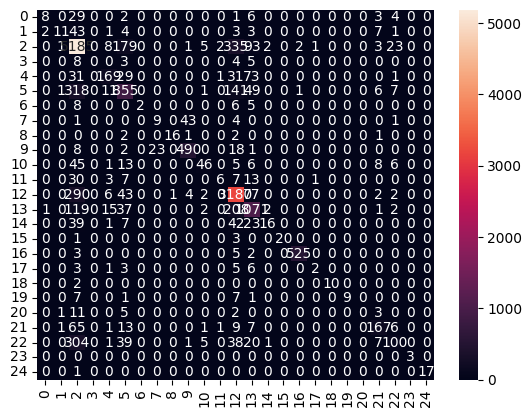

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

svc_model = LinearSVC(dual=False) # FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5.

svc_model.fit(X_train, y_train)

y_predict = svc_model.predict(X_test)

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt='d')

print(classification_report(y_test, y_predict))

Model_prediction = svc_model.predict(X_test[0:100])
print(f'Model Predictions: {Model_prediction}')

Model_TrueLabel = y_test[0:100]
print(f'\nModel True Labels: {Model_TrueLabel}')

In [54]:
#param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
param_grid = {'epochs': [1, 2]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4, return_train_score=True)

model_training_time_label = 'SVM object classification training time: '

# Record the training time
start_time = time.time()
grid.fit(X_train, y_train)
grid.best_params_
grid.best_estimator_
end_time = time.time()

# Calculate training time
training_time = end_time - start_time

# Output the training time into the file
with open('..\\model-comparison-metrics', 'a') as f:
    f.write(f'{model_training_time_label}{training_time}\\n')


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.799, test=0.781) total time=18.5min


: 

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2227
         1.0       0.98      0.98      0.98      2259
         2.0       0.93      0.86      0.89       165
         3.0       0.95      0.92      0.93       755
         4.0       0.99      0.98      0.99       138
         5.0       0.96      0.90      0.93       136
         6.0       0.92      0.91      0.92       266

    accuracy                           0.97      5946
   macro avg       0.96      0.93      0.94      5946
weighted avg       0.97      0.97      0.97      5946



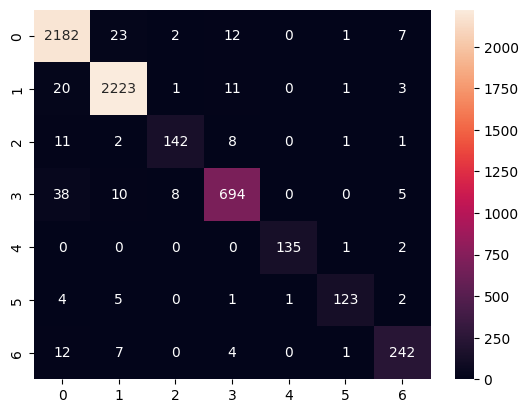

In [ ]:
model_prediction_time_label = 'SVM object classification prediction time: '

# Record the prediction time
start_time = time.time()
grid_predictions = grid.predict(X_test)
end_time = time.time()

# Calculate prediction time
prediction_time = end_time - start_time

# Output the prediction time into the file
with open('model-comparison-metrics', 'a') as f:
    f.write(f'{model_prediction_time_label}{prediction_time}\\n')

print("Prediction time: {0}".format(prediction_time))

# Output the confusion matrix as a heatmap and the classification report
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, grid_predictions))

In [ ]:
model_path = '..\\saved-models\\object-classifcation-svm.pkl'  # replace with the path to your model
dump(grid, model_path) # Save the model
grid = load(model_path)

In [ ]:
def svmDetector(image):
    image = image.astype(np.float32)/255

    h_start = 0
    h_stop = image.shape[0]

    pixels_in_cell = 16
    HOG_orientations = 11
    cells_in_block = 2
    cells_in_step = 3

    masked_region = image[h_start:h_stop,:,:]

    resizing_factor = 1.7
    masked_region_shape = masked_region.shape
    L = masked_region_shape[1]/resizing_factor
    W = masked_region_shape[0]/resizing_factor

    masked_region_resized = cv2.resize(masked_region, (int(L), int(W)))
    masked_region_resized_R = masked_region_resized[:,:,0]
 
    masked_region_hog_feature_all, hog_image = hog(masked_region_resized_R, 
                                        orientations=HOG_orientations,
                                        pixels_per_cell=(pixels_in_cell, pixels_in_cell), 
                                        cells_per_block=(cells_in_block, cells_in_block),  
                                        transform_sqrt=False,
                                        visualize=True, 
                                        feature_vector=False)

    n_blocks_x = (masked_region_resized_R.shape[1] // pixels_in_cell)+1
    n_blocks_y = (masked_region_resized_R.shape[0] // pixels_in_cell)+1

    #nfeat_per_block = orientations * cells_in_block **2
    blocks_in_window = (64 // pixels_in_cell)-1

    steps_x = (n_blocks_x - blocks_in_window) // cells_in_step
    steps_y = (n_blocks_y - blocks_in_window) // cells_in_step

    rectangles_found = []

    for x_blocks in range(steps_x):
        for y_blocks in range(steps_y):
            y_position = y_blocks * cells_in_step
            x_position = x_blocks * cells_in_step

            hog_feat_sample = masked_region_hog_feature_all[y_position : y_position + blocks_in_window, x_position : x_position + blocks_in_window].ravel()
            x_left = x_position * pixels_in_cell
            y_top = y_position * pixels_in_cell
          

            # predict using trained SVM
            #test_prediction = svc_model.predict(hog_feat_sample.reshape(1, -1)) # Basic SVM
            test_prediction = grid.predict(hog_feat_sample.reshape(1, -1))

            if test_prediction == 1:
                rectangle_x_left = int(x_left * resizing_factor)
                rectangle_y_top = int(y_top * resizing_factor)
                window_dim = int(64 * resizing_factor)
                rectangles_found.append(((rectangle_x_left, rectangle_y_top + h_start), (rectangle_x_left + window_dim, rectangle_y_top + window_dim + h_start)))

    print(f'Location of Cars Found: {rectangles_found}')

    
    # plt.figure()
    
    # plt.imshow(Image_with_Rectangles)
    return rectangles_found

#test_image = mpimg.imread('Datasets/CarND-Vehicle-Detection-master/test_images/test1.jpg')


In [ ]:
import cv2

def process_video(video_path, output_path):
    cap = cv2.VideoCapture(video_path)
    
    # Check if the video opened successfully
    if not cap.isOpened():
        print("Error opening video stream or file")
        return

    # Get the video frame width, height, and FPS
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    counter = 0

    while cap.isOpened():
        counter += 1
        print(f'Frame {counter}')

        ret, frame = cap.read()
        if not ret:
            break
        
        # Get bounding boxes for the current frame
        rectangles = svmDetector(frame)

        # Draw rectangles on the frame
        if rectangles != None:
            for rect in rectangles:
                
                top_left = tuple(rect[0])
                bottom_right = tuple(rect[1])
                cv2.rectangle(frame, top_left, bottom_right, (255, 0, 0), -1)  # Draw rectangle
                


        # Write the frame with rectangles to the output video
        out.write(frame)

        # Also display the frame if you want to see it in real-time
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release everything when done
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    
process_video('TestSets/Videos/highway2.mp4', 'output.mp4')

Frame 1
Location of Cars Found: [((163, 244), (271, 352)), ((326, 0), (434, 108)), ((489, 163), (597, 271)), ((489, 326), (597, 434)), ((816, 163), (924, 271)), ((816, 244), (924, 352)), ((897, 163), (1005, 271)), ((897, 244), (1005, 352)), ((897, 571), (1005, 679)), ((1060, 489), (1168, 597)), ((1142, 163), (1250, 271)), ((1142, 326), (1250, 434))]
Frame 2
Location of Cars Found: [((81, 0), (189, 108)), ((81, 163), (189, 271)), ((163, 81), (271, 189)), ((163, 244), (271, 352)), ((489, 163), (597, 271)), ((489, 326), (597, 434)), ((571, 0), (679, 108)), ((571, 163), (679, 271)), ((734, 489), (842, 597)), ((816, 163), (924, 271)), ((816, 571), (924, 679)), ((897, 244), (1005, 352)), ((897, 571), (1005, 679)), ((1060, 489), (1168, 597)), ((1142, 163), (1250, 271))]
Frame 3
Location of Cars Found: [((0, 81), (108, 189)), ((81, 163), (189, 271)), ((163, 81), (271, 189)), ((163, 244), (271, 352)), ((244, 571), (352, 679)), ((326, 571), (434, 679)), ((408, 81), (516, 189)), ((489, 163), (597

Ali
